# Packing problem in CPMpy, with visualization

Based on Alexander Schiendorfer's, but with simplified visualization
https://github.com/Alexander-Schiendorfer/cp-examples/tree/main/packing

Given some 2D rectangels, find the (minimum) 2D area to pack them.

This example requires you to install _matplotlib_.

In [1]:
import matplotlib.pyplot as plt
from cpmpy import *
from cpmpy.expressions.utils import all_pairs

In [2]:
# the CPMpy model and variables
def model_packing_rectangular(widths, heights):
    # Number of different items
    n = len(widths)

    # max dimensions of the whole area
    area_min_x, area_max_x = max(widths), sum(widths)
    area_min_y, area_max_y = max(heights), sum(heights)

    # Decision variables
    pos_x = intvar(0, area_max_x, shape=n)
    pos_y = intvar(0, area_max_y, shape=n)

    total_x = intvar(area_min_x, area_max_x)
    total_y = intvar(area_min_y, area_max_y)

    m = Model()

    ## Necessary constraints
    # Every item has to be within the overall area
    m += [pos_x + widths <= total_x,
          pos_y + heights <= total_y]

    # No-overlap: every item has to be fully above, below or next to every other item
    for i,j in all_pairs(range(n)):
        m += ((pos_x[i] + widths[i] <= pos_x[j]) |
              (pos_x[j] + widths[j] <= pos_x[i]) |
              (pos_y[i] + heights[i] <= pos_y[j]) |
              (pos_y[j] + heights[j] <= pos_y[i]))

    # Minimize wrt the overall area
    m.minimize(total_x*total_y)
    
    ## Optional constraints
    # The needed space needs to be wider than taller
    # m += (total_x > total_y),

    # The needed space has to have a width larger than 10
    # m += (total_x >= 10),

    # The needed space has to have a height larger than 10
    # m += (total_y >= 10)

    return m, (pos_x, pos_y, total_x, total_y)

In [3]:
# the visualisation: add rectangles to a matplotlib figure
def visualize_packing(widths, heights, pos_x, pos_y):
    n = len(widths) # Amount of items

    fig, ax = plt.subplots(figsize=(10,10))

    ax.set_xlim((0, max(pos_x + widths)))
    ax.set_ylim((0, max(pos_y + heights)))
    ax.set_aspect('equal') # same scales

    for (x,y,w,h) in zip(pos_x, pos_y, widths, heights):
        ax.add_patch(plt.Rectangle((x,y),
                                   w, h,
                                   edgecolor='white'))
        ax.annotate(f"{w} x {h}", (x+w/2.0, y+h/2.0), ha='center', va='center',
                    color='white', fontsize=12)

    plt.title(f"Area: {max(pos_x + widths)*max(pos_y + heights)}")
    return plt.show()

In [4]:
# Example data for rectangle packing, 2D dimensions of the rectangles to pack
widths  = [5, 6, 4, 3, 2, 4, 3, 1, 2, 1, 7, 3]
heights = [1, 2, 3, 2, 1, 2, 4, 6, 5, 1, 1, 2]

Total area: 88
pos_x: [0 0 3 3 0 3 0 7 6 2 0 0]
pos_y: [4 2 6 0 6 9 7 5 0 6 5 0]


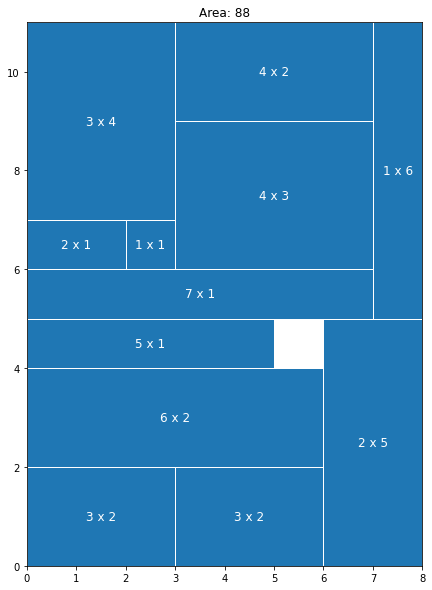

In [5]:
# model, solve, visualize
(model, (pos_x, pos_y, total_x, total_y)) = model_packing_rectangular(widths, heights)

sat = model.solve()
if not sat: raise Exception("No solution found.")

# text output
print(f"Total area: {total_x.value()*total_y.value()}")
print("pos_x:", pos_x.value())
print("pos_y:", pos_y.value())

# visualization
visualize_packing(widths, heights, pos_x.value(), pos_y.value())